[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 401.35


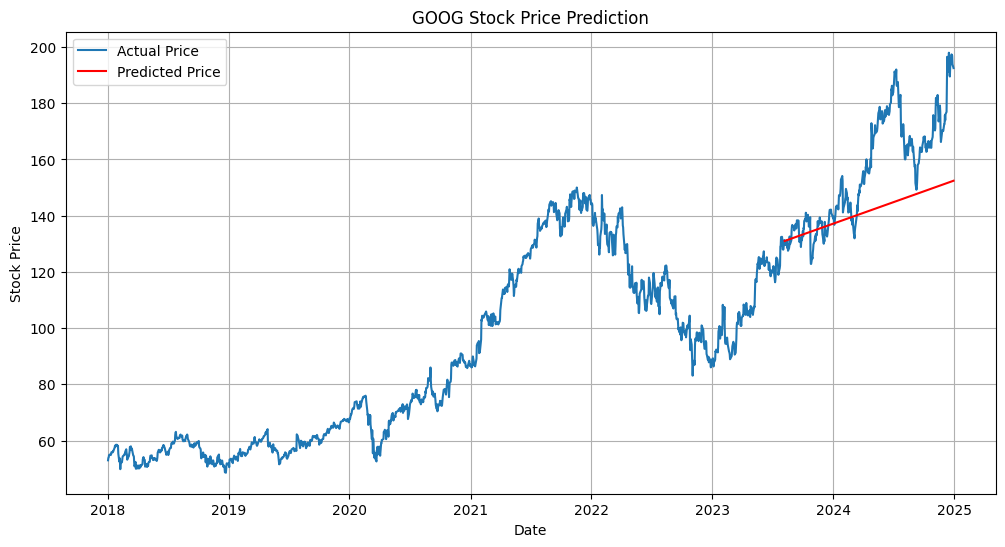

In [9]:
# Stock Price Predictor using Linear Regression

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load stock data
ticker = 'GOOG'  # You can change to any stock like 'GOOG', 'TSLA'
stock_data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)
stock_data.reset_index(inplace=True)

# Step 2: Prepare the data
stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days
X = stock_data[['Days']]
y = stock_data['Close']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Plot results
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Actual Price')
plt.plot(stock_data['Date'][len(X_train):], y_pred, label='Predicted Price', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()
